In [1]:
import numpy as np
import pandas as pd
import pyBigWig
import itertools
sp_file='http://smithdata.usc.edu/methbase/data/Molaro-Sperm-2011/Human_Sperm/tracks_hg19/Human_Sperm.hmr.bb'
ftp='ftp://ftp.ensembl.org/pub/grch37/current/fasta/homo_sapiens/dna/'

def get_seq(chrs):
    asmbl={}
    for ch in chrs:
        print(ch,end =",")
        asmbl[ch]=ftp+'Homo_sapiens.GRCh37.dna.chromosome.'+str(ch)+'.fa.gz'
        asmbl[ch]=pd.read_csv(asmbl[ch])
        asmbl[ch]=''.join(asmbl[ch].iloc[:,0].tolist())
    return (asmbl)    

def ranges(i):
    for a, b in itertools.groupby(enumerate(i), lambda pair: pair[1] - pair[0]):
        b = list(b)
        yield b[0][1], b[-1][1]
        

In [2]:
bb=pyBigWig.open(sp_file)
sp=bb.entries('chr22', 0, -1)
len(sp)
sps=[]
for i in sp:
    sps.append(set(range(i[0],i[1])))
sps=frozenset().union(*sps)
print(len(sps))
np.max(list(sps))

2145364


51223635

In [3]:
cgi=pd.read_table('c22',index_col=0)
print(len(cgi))

719


In [5]:
cgi['i']=cgi.apply(lambda x:(x['chromStart'],x['chromEnd']),1)
cgis=[]
for i in cgi.i.values:
    cgis.append(set(range(i[0],i[1])))
cgis=frozenset().union(*cgis)
print(len(cgis))

562123


In [6]:
len(cgis&sps)

470304

In [7]:
len(cgis&sps)/len(cgis)

0.8366567459435035

In [8]:
asmbl=get_seq([22])
len(asmbl[22])

22,

51304566

In [9]:
ch=22
asmbl[ch][1000]

'N'

In [10]:
ch=22
d=1000
cgms=[]
for b in range(len(asmbl[ch]))[:20000000]:
    if asmbl[ch][b]=='N':
        cgms.append(0)
    else:
        c=asmbl[ch][b-d:b+d].count('C')
        g=asmbl[ch][b-d:b+d].count('G')
        cg=asmbl[ch][b-d:b+d].count('CG')
        tg=asmbl[ch][b-d:b+d].count('TG')
        ca=asmbl[ch][b-d:b+d].count('CA')
        m=(2*cg+1)/(tg+ca+1)
        m=np.round(m,2)
        cgms.append(m)

In [11]:
t=pd.DataFrame(cgms)

<AxesSubplot:>

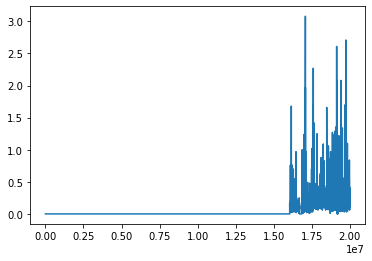

In [12]:
t[0].plot()

In [13]:
t['chrom']='chr22'

In [14]:
t['chromStart']=t.index+1
t['chromEnd']=t.index+2
t['dataValue']=t[0]

In [15]:
t=t.drop([0],1)

In [16]:
t

,chrom,chromStart,chromEnd,dataValue
0,chr22,1,2,0.00
1,chr22,2,3,0.00
2,chr22,3,4,0.00
3,chr22,4,5,0.00
4,chr22,5,6,0.00
...,...,...,...,...
19999995,chr22,19999996,19999997,0.17
19999996,chr22,19999997,19999998,0.17
19999997,chr22,19999998,19999999,0.17
19999998,chr22,19999999,20000000,0.17


In [17]:
t.to_csv('c22.tsv',index=False, header=False, sep ='\t')

In [173]:
ch=22
d=1000
cgms=[]
for b in range(len(asmbl[ch])-d):
    c=asmbl[ch][b-d:b+d].count('C')
    g=asmbl[ch][b-d:b+d].count('G')
    if c+g>d:
        cg=asmbl[ch][b-d:b+d].count('CG')
        if cg>0:
            tg=asmbl[ch][b-d:b+d].count('TG')
            ca=asmbl[ch][b-d:b+d].count('CA')
            if tg+ca==0:
                cgms.append(b) 
            else:
                m=(2*cg)/(tg+ca)
                if m>.8:
                   cgms.append(b) 

In [8]:
cgms=list(ranges(list(cgms)))

NameError: name 'cgms' is not defined

In [175]:
cgms=[c for c in cgms if c[1]-c[0]>200]

In [176]:
len(cgms)

374

In [177]:
cgmss=[]
for i in cgms:
    cgmss.append(set(range(i[0],i[1])))
cgmss=frozenset().union(*cgmss)
len(cgmss)

618937

In [178]:
len(cgmss&sps)

580713

In [179]:
len(cgmss&sps)/len(cgmss)

0.9382425028718593